<a href="https://colab.research.google.com/github/Ryeongeun-Kim/AI/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Vanilla 코드

In [1]:
import numpy as np
from numpy.random import randn
N, D_in, H, D_out = 64, 1000, 100, 10
x, y = randn(N, D_in), randn(N, D_out)
w1, w2 = randn(D_in, H), randn(H, D_out)
for t in range(2000):
  h = 1/(1 + np.exp(-x.dot(w1)))
  y_pred = h.dot(w2)
  loss = np.square(y_pred-y).sum()
  print(t, loss)

  grad_y_pred = 2.0 * (y_pred - y)
  grad_w2 = h.T.dot(grad_y_pred)
  grad_h = grad_y_pred.dot(w2.T)
  grad_w1 = x.T.dot(grad_h * h * (1-h))

  lr = 1e-4
  w1 -= lr * grad_w1
  w2 -= lr * grad_w2

0 52463.1620771813
1 29304.879167130923
2 19668.551214129744
3 15157.766037669311
4 12800.053968302149
5 11420.345585344076
6 10582.193159322842
7 10021.554235441376
8 9585.406607968976
9 9216.503495404108
10 8874.511397737242
11 8575.112084894414
12 8318.417002385311
13 8071.733839724745
14 7831.963758472952
15 7601.602429642018
16 7396.878270949139
17 7212.843992384378
18 7041.917104292032
19 6877.72352795472
20 6717.694454865228
21 6565.088322612952
22 6421.526184701972
23 6281.814567374784
24 6145.116879182214
25 6017.316938505415
26 5899.921407552581
27 5788.897257600785
28 5680.91086038895
29 5577.599159318335
30 5480.681026174478
31 5387.271748068253
32 5296.047439734946
33 5206.62124220898
34 5117.687695443392
35 5028.131812948325
36 4938.974483035385
37 4852.091403048173
38 4765.379441873404
39 4676.149417485032
40 4591.097109852635
41 4514.692815030048
42 4443.059399684389
43 4374.059844029439
44 4306.764639283898
45 4239.885651374832
46 4172.127523161126
47 4103.77837716521


# 2. SGD 방법 구현

In [2]:
import numpy as np
from numpy.random import randn

N, D_in, H, D_out = 64, 1000, 100, 10
epochs = 20
batch_sizes = [100, 200, 1000]

for batch_size in batch_sizes:
    x, y = randn(N, D_in), randn(N, D_out)
    w1, w2 = randn(D_in, H), randn(H, D_out)

    for epoch in range(epochs):
        permutation = np.random.permutation(N)
        x_shuffled = x[permutation]
        y_shuffled = y[permutation]

        for i in range(0, N, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            h = 1/(1 + np.exp(-x_batch.dot(w1)))
            y_pred = h.dot(w2)
            loss = np.square(y_pred-y_batch).sum()

            grad_y_pred = 2.0 * (y_pred - y_batch)
            grad_w2 = h.T.dot(grad_y_pred)
            grad_h = grad_y_pred.dot(w2.T)
            grad_w1 = x_batch.T.dot(grad_h * h * (1-h))

            lr = 1e-4
            w1 -= lr * grad_w1
            w2 -= lr * grad_w2

        print(f"Epoch {epoch}, Batch Size {batch_size}, Loss {loss}")

Epoch 0, Batch Size 100, Loss 29476.697270033204
Epoch 1, Batch Size 100, Loss 19804.328421402784
Epoch 2, Batch Size 100, Loss 15641.264615597995
Epoch 3, Batch Size 100, Loss 13525.987493164108
Epoch 4, Batch Size 100, Loss 12320.824004505417
Epoch 5, Batch Size 100, Loss 11487.683283145783
Epoch 6, Batch Size 100, Loss 10887.088436349466
Epoch 7, Batch Size 100, Loss 10421.534415846938
Epoch 8, Batch Size 100, Loss 10042.340614833614
Epoch 9, Batch Size 100, Loss 9720.859473194609
Epoch 10, Batch Size 100, Loss 9415.40330543502
Epoch 11, Batch Size 100, Loss 9105.515560575886
Epoch 12, Batch Size 100, Loss 8843.812894449151
Epoch 13, Batch Size 100, Loss 8612.200702139924
Epoch 14, Batch Size 100, Loss 8395.830922117893
Epoch 15, Batch Size 100, Loss 8192.151497183284
Epoch 16, Batch Size 100, Loss 8003.72090927327
Epoch 17, Batch Size 100, Loss 7826.874951803744
Epoch 18, Batch Size 100, Loss 7656.245292679063
Epoch 19, Batch Size 100, Loss 7491.8124814394405
Epoch 0, Batch Size 20

# 3. GD 방법과의 차이

GD (Gradient Descent): GD방식은 전체 데이터셋을 사용하여 오차의 그래디언트를 계산하고, 이를 사용해 가중치를 업데이트합니다. 전체 데이터셋을 사용하기 때문에 정확도는 높지만 데이터셋이 클 경우에는 시간 비용이 많이드는 단점이 있다.
SGD (Stochastic Gradient Descent): 매 업데이트에서 전체 데이터셋이 아닌, 무작위로 선택된 소수의 샘플만을 사용하여 그래디언트를 구합니다. 그렇기 때문에 GD 방식보다 더 빠르고 대규모 데이터셋에서도  효율적입니다.

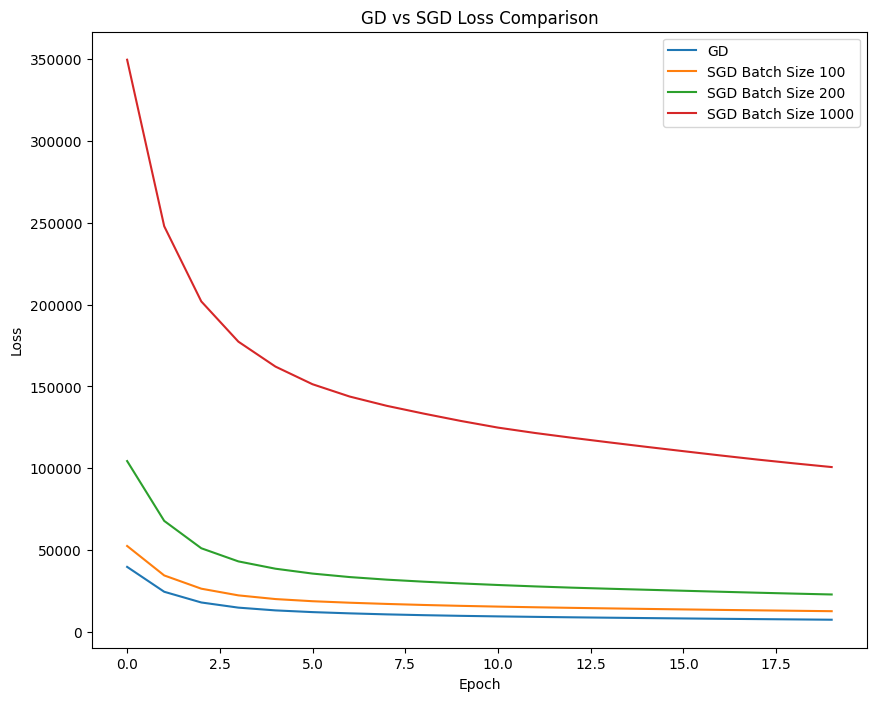

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

N, D_in, H, D_out = 64, 1000, 100, 10
epochs = 20
batch_sizes = [100, 200, 1000]  # SGD를 위한 배치 사이즈
lr = 1e-4

# GD를 위한 데이터 준비
x, y = randn(N, D_in), randn(N, D_out)
w1, w2 = randn(D_in, H), randn(H, D_out)
gd_loss_history = []

# GD 방식
for epoch in range(epochs):
    h = 1 / (1 + np.exp(-x.dot(w1)))
    y_pred = h.dot(w2)
    loss = np.square(y_pred - y).sum()
    gd_loss_history.append(loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h.T.dot(grad_y_pred)
    grad_h = grad_y_pred.dot(w2.T)
    grad_w1 = x.T.dot(grad_h * h * (1 - h))

    w1 -= lr * grad_w1
    w2 -= lr * grad_w2

# SGD 방식
sgd_loss_history = {batch_size: [] for batch_size in batch_sizes}

for batch_size in batch_sizes:
    x, y = randn(N, D_in), randn(N, D_out)
    w1, w2 = randn(D_in, H), randn(H, D_out)

    for epoch in range(epochs):
        permutation = np.random.permutation(N)
        x_shuffled = x[permutation]
        y_shuffled = y[permutation]
        epoch_loss = 0

        for i in range(0, N, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            h = 1 / (1 + np.exp(-x_batch.dot(w1)))
            y_pred = h.dot(w2)
            loss = np.square(y_pred - y_batch).sum()
            epoch_loss += loss

            grad_y_pred = 2.0 * (y_pred - y_batch)
            grad_w2 = h.T.dot(grad_y_pred)
            grad_h = grad_y_pred.dot(w2.T)
            grad_w1 = x_batch.T.dot(grad_h * h * (1 - h))

            w1 -= lr * grad_w1
            w2 -= lr * grad_w2

        sgd_loss_history[batch_size].append(epoch_loss / (N / batch_size))

plt.figure(figsize=(10, 8))
plt.plot(gd_loss_history, label='GD')

for batch_size, losses in sgd_loss_history.items():
    plt.plot(losses, label=f'SGD Batch Size {batch_size}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('GD vs SGD Loss Comparison')
plt.show()

# 4. Best hyper-parameter set 찾기

<ipython-input-14-7f8ade5a475c>:11: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-x.dot(self.w1)))
<ipython-input-14-7f8ade5a475c>:37: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-x_batch.dot(model.w1)))


Best batch size: 1000, Best learning rate: 0.001, Best loss: 6281.9942273491


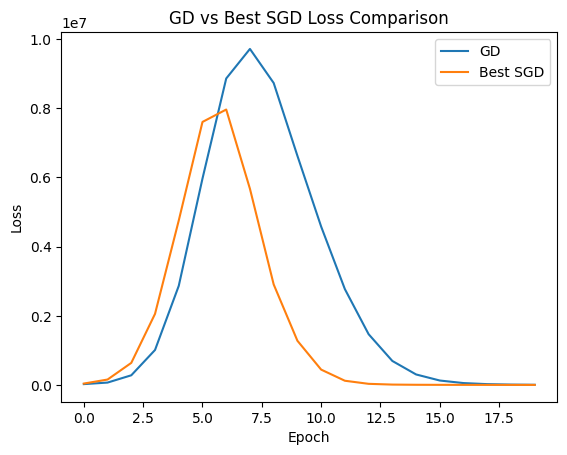

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

class Model:
    def __init__(self, D_in, H, D_out):
        self.w1 = randn(D_in, H)
        self.w2 = randn(H, D_out)

    def predict(self, x):
        h = 1 / (1 + np.exp(-x.dot(self.w1)))
        y_pred = h.dot(self.w2)
        return y_pred

    def update(self, grad_w1, grad_w2, lr):
        self.w1 -= lr * grad_w1
        self.w2 -= lr * grad_w2

def sgd(x, y, model, batch_size, epochs, lr):
    N = x.shape[0]
    loss_history = []
    for epoch in range(epochs):
        permutation = np.random.permutation(N)
        x_shuffled = x[permutation]
        y_shuffled = y[permutation]
        for i in range(0, N, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            y_pred = model.predict(x_batch)
            loss = np.square(y_pred - y_batch).sum()
            loss_history.append(loss)

            grad_y_pred = 2.0 * (y_pred - y_batch)
            h = 1 / (1 + np.exp(-x_batch.dot(model.w1)))
            grad_w2 = h.T.dot(grad_y_pred)
            grad_h = grad_y_pred.dot(model.w2.T)
            grad_w1 = x_batch.T.dot(grad_h * h * (1 - h))

            model.update(grad_w1, grad_w2, lr)
    return loss_history

N, D_in, H, D_out = 64, 1000, 100, 10
epochs = 20
X_train, y_train = randn(N, D_in), randn(N, D_out)

batch_sizes = [100, 200, 1000]
best_loss = float('inf')
best_params = None

for batch_size in batch_sizes:
    for lr in [0.001, 0.01, 0.1]:
        model = Model(D_in, H, D_out)
        loss_history = sgd(X_train, y_train, model, batch_size, epochs, lr)
        final_loss = loss_history[-1]
        if final_loss < best_loss:
            best_loss = final_loss
            best_params = (batch_size, lr)

print(f"Best batch size: {best_params[0]}, Best learning rate: {best_params[1]}, Best loss: {best_loss}")

model = Model(D_in, H, D_out)
best_loss_history = sgd(X_train, y_train, model, best_params[0], epochs, best_params[1])

plt.plot(gd_loss_history, label='GD')
plt.plot(best_loss_history, label='Best SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('GD vs Best SGD Loss Comparison')
plt.show()


# 4. Best hyper-parameter set과 vanilla code 비교

<ipython-input-17-bc6f8d61692f>:31: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-x.dot(self.w1)))
<ipython-input-17-bc6f8d61692f>:55: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-x_batch.dot(model.w1)))


Best batch size: 1000, Best learning rate: 0.001, Best loss: 4417.174066645704


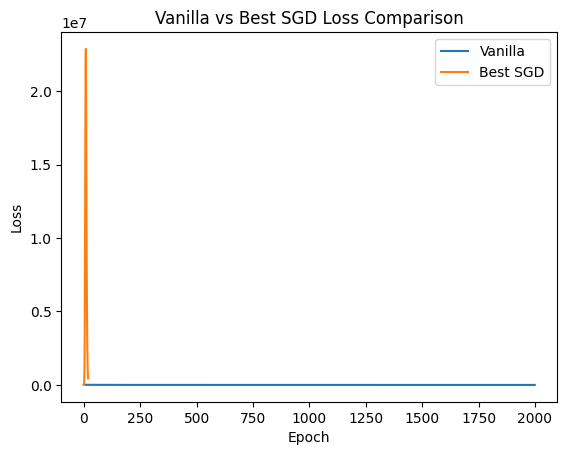

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

# Vanilla 코드
def vanilla_training(x, y, D_in, H, D_out, epochs=2000, lr=1e-4):
    w1, w2 = randn(D_in, H), randn(H, D_out)
    loss_history = []
    for t in range(epochs):
        h = 1 / (1 + np.exp(-x.dot(w1)))
        y_pred = h.dot(w2)
        loss = np.square(y_pred - y).sum()
        loss_history.append(loss)

        grad_y_pred = 2.0 * (y_pred - y)
        grad_w2 = h.T.dot(grad_y_pred)
        grad_h = grad_y_pred.dot(w2.T)
        grad_w1 = x.T.dot(grad_h * h * (1 - h))

        w1 -= lr * grad_w1
        w2 -= lr * grad_w2

    return loss_history

class Model:
    def __init__(self, D_in, H, D_out):
        self.w1 = randn(D_in, H)
        self.w2 = randn(H, D_out)

    def predict(self, x):
        h = 1 / (1 + np.exp(-x.dot(self.w1)))
        y_pred = h.dot(self.w2)
        return y_pred

    def update(self, grad_w1, grad_w2, lr):
        self.w1 -= lr * grad_w1
        self.w2 -= lr * grad_w2

def sgd(x, y, model, batch_size, epochs, lr):
    N = x.shape[0]
    loss_history = []
    for epoch in range(epochs):
        permutation = np.random.permutation(N)
        x_shuffled = x[permutation]
        y_shuffled = y[permutation]
        for i in range(0, N, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            y_pred = model.predict(x_batch)
            loss = np.square(y_pred - y_batch).sum()
            loss_history.append(loss)

            grad_y_pred = 2.0 * (y_pred - y_batch)
            h = 1 / (1 + np.exp(-x_batch.dot(model.w1)))
            grad_w2 = h.T.dot(grad_y_pred)
            grad_h = grad_y_pred.dot(model.w2.T)
            grad_w1 = x_batch.T.dot(grad_h * h * (1 - h))

            model.update(grad_w1, grad_w2, lr)
    return loss_history

N, D_in, H, D_out = 64, 1000, 100, 10
epochs = 20
X_train, y_train = randn(N, D_in), randn(N, D_out)

batch_sizes = [100, 200, 1000]
best_loss = float('inf')
best_params = None

for batch_size in batch_sizes:
    for lr in [0.001, 0.01, 0.1]:
        model = Model(D_in, H, D_out)
        loss_history = sgd(X_train, y_train, model, batch_size, epochs, lr)
        final_loss = loss_history[-1]
        if final_loss < best_loss:
            best_loss = final_loss
            best_params = (batch_size, lr)

print(f"Best batch size: {best_params[0]}, Best learning rate: {best_params[1]}, Best loss: {best_loss}")

model = Model(D_in, H, D_out)
best_loss_history = sgd(X_train, y_train, model, best_params[0], epochs, best_params[1])

vanilla_loss_history = vanilla_training(X_train, y_train, D_in, H, D_out, epochs=2000)

plt.plot(vanilla_loss_history, label='Vanilla')
plt.plot(best_loss_history, label='Best SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Vanilla vs Best SGD Loss Comparison')
plt.show()